In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['PercentOver25CompletedHighSchool.csv', 'PoliceKillingsUS.csv', 'MedianHouseholdIncome2015.csv', 'ShareRaceByCity.csv', 'PercentagePeopleBelowPovertyLevel.csv']


In [2]:
median_house_hold_in_come = pd.read_csv('../input/MedianHouseholdIncome2015.csv', encoding="windows-1252")
percentage_people_below_poverty_level = pd.read_csv('../input/PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
percent_over_25_completed_highSchool = pd.read_csv('../input/PercentOver25CompletedHighSchool.csv', encoding="windows-1252")
share_race_city = pd.read_csv('../input/ShareRaceByCity.csv', encoding="windows-1252")
kill = pd.read_csv('../input/PoliceKillingsUS.csv', encoding="windows-1252")

In [3]:
median_house_hold_in_come.head()

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667


In [4]:
percentage_people_below_poverty_level.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [5]:
percent_over_25_completed_highSchool.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [6]:
share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [7]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [8]:
percentage_people_below_poverty_level["Geographic Area"].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

**BAR PLOT**

In [9]:
percentage_people_below_poverty_level.poverty_rate.value_counts()

0       1464
-        201
6.7      129
7.4      129
10.9     128
10       128
6.3      126
4.4      126
8.3      125
11.5     125
7.9      123
8.6      122
8.7      122
5.9      122
11.1     122
10.2     122
8.8      121
12.8     121
14.3     121
13.5     120
9.1      120
8.5      120
9.3      118
11.2     118
16       118
10.8     118
15.4     118
7.6      117
8        117
7.3      117
        ... 
86.1       1
76.7       1
57.2       1
67.5       1
83.6       1
84.3       1
88.9       1
73.9       1
89.6       1
73.3       1
67.8       1
70.5       1
68         1
65.1       1
92         1
73.8       1
69.1       1
67.6       1
93.4       1
70         1
75         1
88.4       1
61.5       1
68.5       1
81.9       1
74.8       1
71.1       1
88         1
82.4       1
66.3       1
Name: poverty_rate, Length: 771, dtype: int64

Text(0.5, 1.0, 'Poverty Rate Given States')

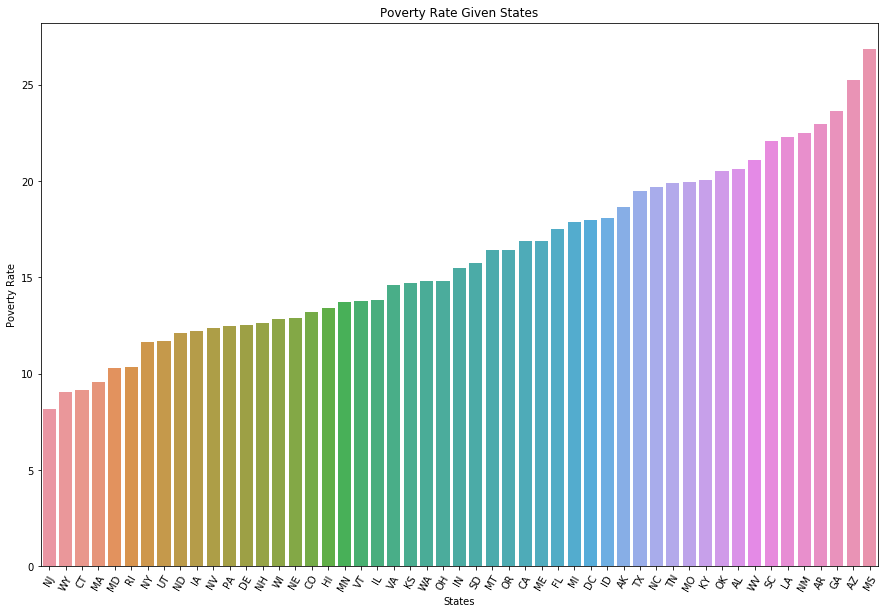

In [10]:
percentage_people_below_poverty_level.poverty_rate.replace(['-'],0.0,inplace=True)
percentage_people_below_poverty_level.poverty_rate = percentage_people_below_poverty_level.poverty_rate.astype(float)
areaList=list(percentage_people_below_poverty_level['Geographic Area'].unique())
area_poverty_ratio=[]
for i in areaList:
    x = percentage_people_below_poverty_level[percentage_people_below_poverty_level['Geographic Area']==i]
    area_poverty_rate = sum(x.poverty_rate)/len(x)
    area_poverty_ratio.append(area_poverty_rate)
    
data=pd.DataFrame({'areaList': areaList,'area_poverty_ratio':area_poverty_ratio})
new_index=(data['area_poverty_ratio'].sort_values(ascending=True)).index.values
sorted_data = data.reindex(new_index)

#Visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['areaList'],y=sorted_data['area_poverty_ratio'])
plt.xticks(rotation= 60)
plt.xlabel('States')
plt.ylabel('Poverty Rate')
plt.title('Poverty Rate Given States')

In [11]:
share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [12]:
share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
Geographic area          29268 non-null object
City                     29268 non-null object
share_white              29268 non-null object
share_black              29268 non-null object
share_native_american    29268 non-null object
share_asian              29268 non-null object
share_hispanic           29268 non-null object
dtypes: object(7)
memory usage: 1.6+ MB


[Text(0, 0.5, 'States'),
 Text(0.5, 0, 'Percentage of Races'),
 Text(0.5, 1.0, "Percentage of State's Population According to Races ")]

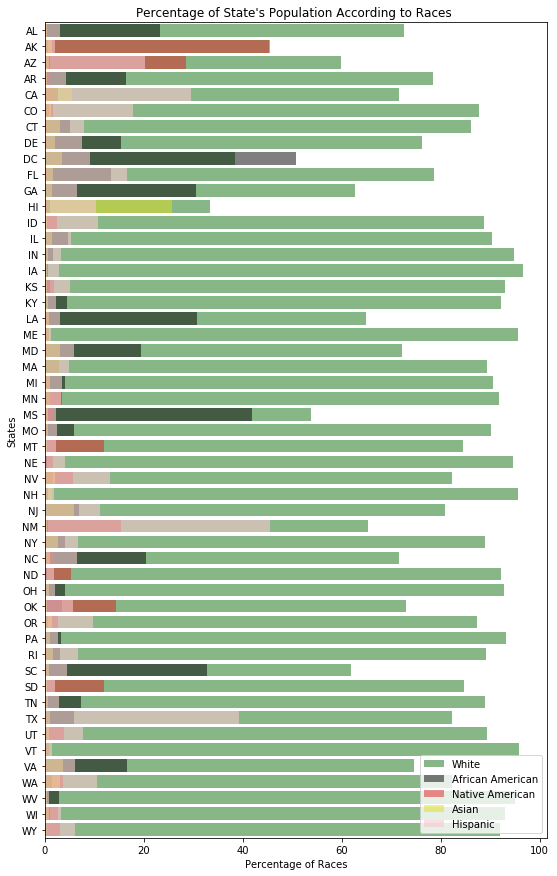

In [13]:
#share_race_city.share_white.value_counts()
#share_race_city.share_black.value_counts()
#share_race_city.share_native_american.value_counts()
#share_race_city.share_asian.value_counts()
#share_race_city.share_hispanic.value_counts()
share_race_city.replace(['-'],0.0,inplace=True)
share_race_city.replace(['(X)'],0.0,inplace=True)
share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']]=share_race_city.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']].astype(float)
areaList=list(share_race_city['Geographic area'].unique())
share_white=[]
share_black=[]
share_native_american=[]
share_asian=[]
share_hispanic=[]

for i in areaList:
    x = share_race_city[share_race_city['Geographic area']==i]
    share_white.append(sum(x.share_white)/len(x))
    share_black.append(sum(x.share_black) / len(x))
    share_native_american.append(sum(x.share_native_american) / len(x))
    share_asian.append(sum(x.share_asian) / len(x))
    share_hispanic.append(sum(x.share_hispanic) / len(x))
    
f,ax=plt.subplots(figsize=(9,15))
sns.barplot(x=share_white,y=areaList,color='green',alpha=0.5,label='White')
sns.barplot(x=share_black,y=areaList,color='black',alpha=0.5,label='African American')
sns.barplot(x=share_native_american,y=areaList,color='red',alpha=0.5,label ='Native American')
sns.barplot(x=share_asian,y=areaList,color='yellow',alpha=0.5,label='Asian')
sns.barplot(x=share_hispanic,y=areaList,color='pink',alpha=0.6,label='Hispanic')
    
ax.legend(loc='lower right',frameon=True)
ax.set(xlabel='Percentage of Races', ylabel='States',title = "Percentage of State's Population According to Races ")

Text(0.5, 1.0, "Percentage of Given State's Population Above 25 that Has Graduated High School")

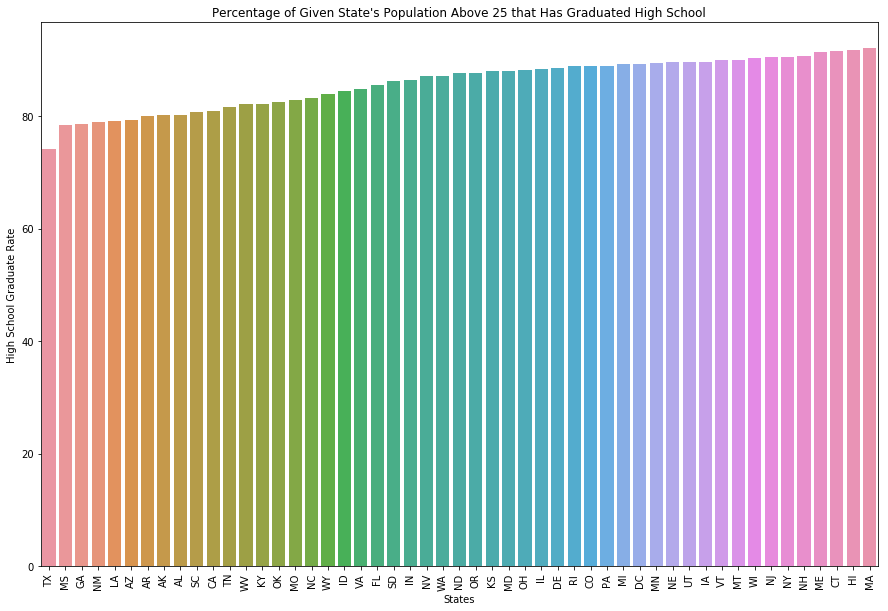

In [14]:
percent_over_25_completed_highSchool.percent_completed_hs.replace(['-'],0.0,inplace = True)
percent_over_25_completed_highSchool.percent_completed_hs = percent_over_25_completed_highSchool.percent_completed_hs.astype(float)
areaList = list(percent_over_25_completed_highSchool['Geographic Area'].unique())
area_highschool = []
for i in areaList:
    x = percent_over_25_completed_highSchool[percent_over_25_completed_highSchool['Geographic Area']==i]
    area_highschool_rate = sum(x.percent_completed_hs)/len(x)
    area_highschool.append(area_highschool_rate)
# sorting
data = pd.DataFrame({'areaList': areaList,'area_highschool_ratio':area_highschool})
new_index = (data['area_highschool_ratio'].sort_values(ascending=True)).index.values
sorted_data2 = data.reindex(new_index)
# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data2['areaList'], y=sorted_data2['area_highschool_ratio'])
plt.xticks(rotation= 90)
plt.xlabel('States')
plt.ylabel('High School Graduate Rate')
plt.title("Percentage of Given State's Population Above 25 that Has Graduated High School")

**POINT PLOT**

In [15]:
sorted_data.head()


,areaList,area_poverty_ratio
30,NJ,8.160917
50,WY,9.063725
6,CT,9.137500
21,MA,9.546341
20,MD,10.272394


In [16]:
sorted_data2.head()

,areaList,area_highschool_ratio
43,TX,74.086949
24,MS,78.470718
10,GA,78.634450
31,NM,78.971783
18,LA,79.122363


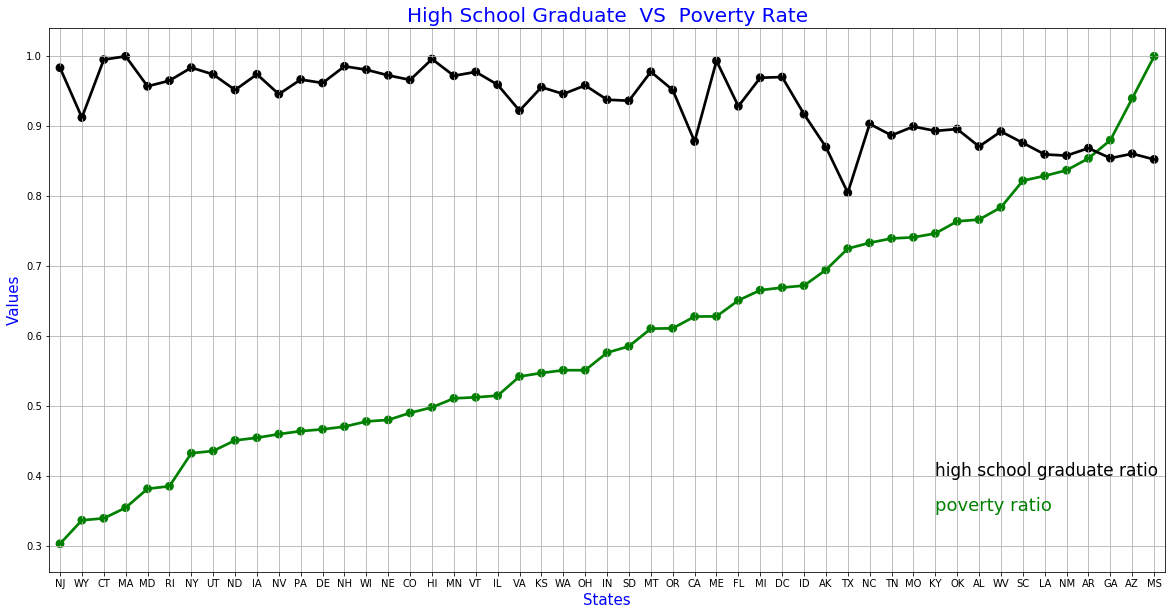

In [17]:
sorted_data['area_poverty_ratio']=sorted_data['area_poverty_ratio']/max(sorted_data['area_poverty_ratio'])
sorted_data2['area_highschool_ratio']=sorted_data2['area_highschool_ratio']/max(sorted_data2['area_highschool_ratio'])
data=pd.concat([sorted_data,sorted_data2['area_highschool_ratio']],axis=1)
data.sort_values('area_poverty_ratio',inplace=True)

#Visualize
f,x1=plt.subplots(figsize=(20,10))
sns.pointplot(x='areaList',y='area_poverty_ratio',data=data, color='green')
sns.pointplot(x='areaList',y='area_highschool_ratio',data=data, color='black')
plt.text(40,0.4,'high school graduate ratio',color='black',fontsize = 17)
plt.text(40,0.35,'poverty ratio',color='green',fontsize = 18)
plt.xlabel('States',fontsize = 15,color='blue')
plt.ylabel('Values',fontsize = 15,color='blue')
plt.title('High School Graduate  VS  Poverty Rate',fontsize = 20,color='blue')
plt.grid()


**JOINT PLOT**

In [18]:
data.head()

,areaList,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


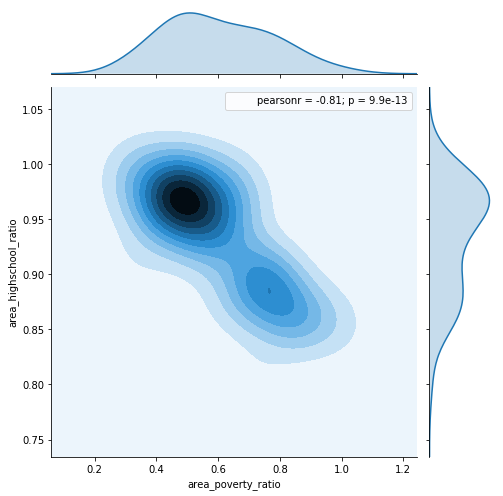

In [19]:
g=sns.jointplot(data.area_poverty_ratio,data.area_highschool_ratio,kind='kde' ,height=7)

#pearsonr
from scipy import stats
g = g.annotate(stats.pearsonr)

plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


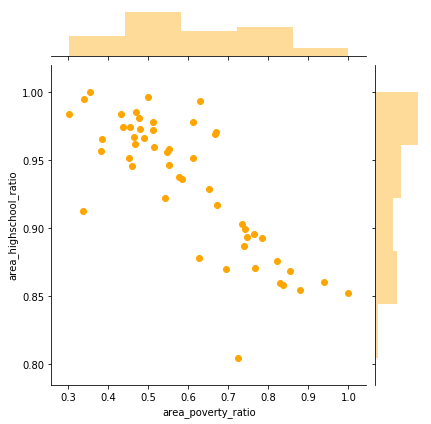

In [20]:
t=sns.jointplot(data.area_poverty_ratio,data.area_highschool_ratio,ratio=6,color="orange")

****Pie Chart****

In [21]:
kill.race.head(10)

0    A
1    W
2    H
3    W
4    H
5    W
6    H
7    W
8    W
9    B
Name: race, dtype: object

Text(0.5, 1.0, 'Killed People According to Races')

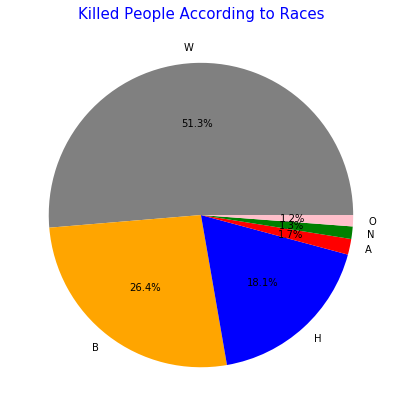

In [22]:
kill.race.dropna(inplace=True)
labels=kill.race.value_counts().index
kill.race.value_counts()
colors=['grey','orange','blue','red','green','pink']
explode=[0,0,0,0,0,0]
sizes=kill.race.value_counts().values

#visualite
plt.figure(figsize=(7,7))
plt.pie(sizes,explode=explode,colors=colors,labels=labels,autopct='%1.1f%%')
plt.title('Killed People According to Races',color = 'blue',fontsize = 15)

**LM Plot**

In [23]:
data.head()

,areaList,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


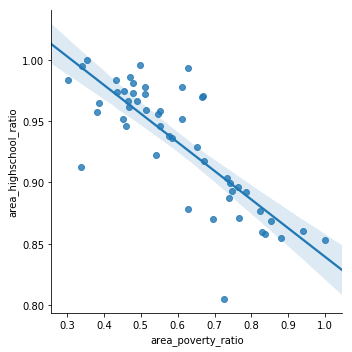

In [24]:
sns.lmplot(x="area_poverty_ratio",y="area_highschool_ratio" ,data=data)

**KDE Plot**

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


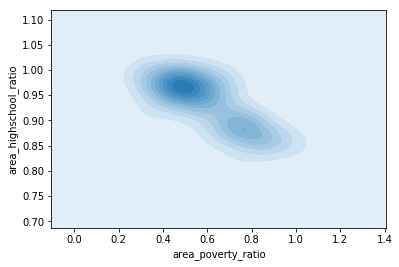

In [25]:
sns.kdeplot(data.area_poverty_ratio,data.area_highschool_ratio, shade=True, cut=5)
plt.show()

**Violin Plot**

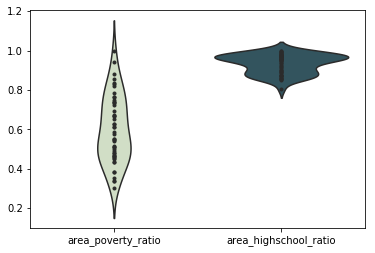

In [26]:
pal=sns.cubehelix_palette(2, rot=-.5, dark=.3)
sns.violinplot(data=data,palette=pal,inner="points")
plt.show()

**HeatMap**

In [27]:
data.head()

,areaList,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


In [28]:
data.corr()

,area_poverty_ratio,area_highschool_ratio
area_poverty_ratio,1.000000,-0.805761
area_highschool_ratio,-0.805761,1.000000


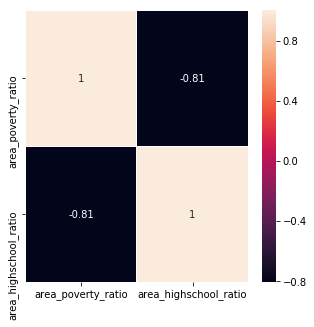

In [29]:
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(data.corr(),annot=True,linewidths=0.5 ,ax=ax)
plt.show()

**Box Plot**

In [30]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


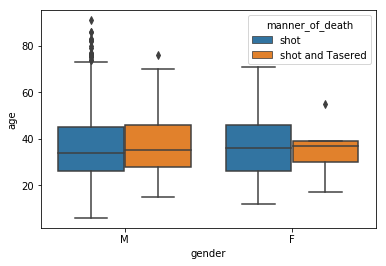

In [32]:
sns.boxplot(x="gender",y="age",hue="manner_of_death",data=kill)
plt.show()

**Swarm Plot**

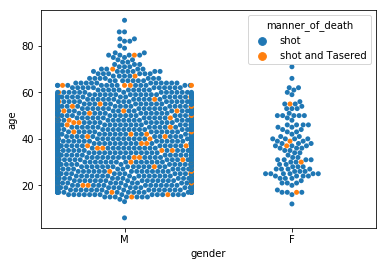

In [34]:
sns.swarmplot(x="gender",y="age",hue="manner_of_death",data=kill)
plt.show()

**Pair Plot**

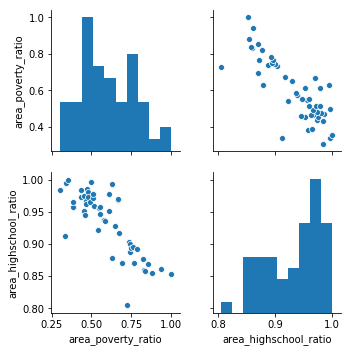

In [39]:
sns.pairplot(data)
plt.show()

**Count Plot**

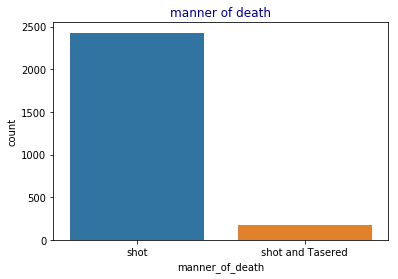

In [48]:
sns.countplot(kill.gender)
sns.countplot(kill.manner_of_death)
plt.title("manner of death", color="DarkBlue")
plt.show()